(10, 1, 6, 2000)
(10, 1, 6, 2000)


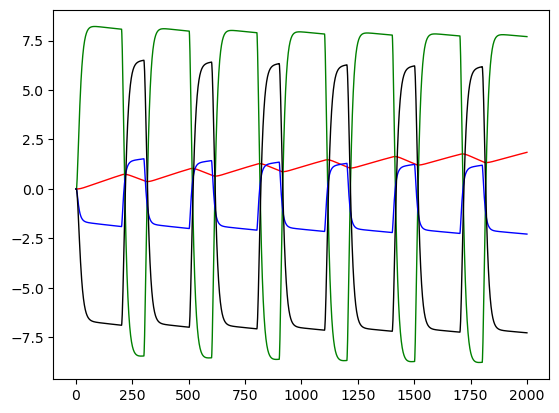

In [8]:

from toolbox import OneDModel_TBK as ODM
import importlib
importlib.reload(ODM)

# Temps_ori, F, Fadv = ODM.OneDModel(wnoise_level = 0.01, if_shift=True, lag_multiplier=2, show_figures=False)
Temps_ori, F, Fadv = ODM.OneDModel(runlength=2000, bpss_reoccurence=200, bpss_length=100, wnoise_level = 0.005, if_shift=False, lag_multiplier=20, show_figures=False)

import matplotlib.pyplot as plt
import numpy as np


Temps=Temps_ori

time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

plt.figure()
idx=9
# Last loop (i == 10), plot in black
plt.plot(time, Temps[idx, 0, 1, :], 'r', linewidth=1)
plt.plot(time, Temps[idx, 0, 2, :], 'g', linewidth=1)
plt.plot(time, Temps[idx, 0, 3, :], 'b', linewidth=1)
plt.plot(time, Temps[idx, 0, 4, :], 'k', linewidth=1)



# print the shape of original data and resampled data
print(Temps_ori.shape)
print(Temps.shape)

In [12]:
import pandas as pd
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)

idx = 9
data_array = Temps[idx, 0, 1:5, :].T.copy()
time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

# Prepare DataFrame
df_BOX2 = pd.DataFrame({
    'age': time,
    'BOX2': data_array[:, 1],  
})

df_BOX3 = pd.DataFrame({
    'age': time,
    'BOX3': data_array[:, 2],    
})


cf.find_optimal_E_tau(df_BOX2, df_BOX3, maxE=10, maxTau=-20)




[INFO] Using lib=1 1990, pred=1 1990


[INFO] Best E=3, tau=-20 with rho=0.999


(3,
 -20,
 array([[0.96623995, 0.96623995, 0.96623995, 0.96623995, 0.96623995,
         0.96623995, 0.96623995, 0.96623995, 0.96623995, 0.96623995,
         0.96623995, 0.96623995, 0.96623995, 0.96623995, 0.96623995,
         0.96623995, 0.96623995, 0.96623995, 0.96623995, 0.96623995],
        [0.99671985, 0.99749884, 0.99793823, 0.99824033, 0.99843615,
         0.99856372, 0.99872311, 0.99883067, 0.99895761, 0.99901742,
         0.99907176, 0.99913282, 0.99919656, 0.99921801, 0.99924587,
         0.9992737 , 0.99930165, 0.99930813, 0.99930641, 0.99927815],
        [0.99726358, 0.99807983, 0.99845925, 0.99870816, 0.9988998 ,
         0.99904679, 0.99914862, 0.99923743, 0.99928043, 0.99932645,
         0.99935439, 0.99937506, 0.99937769, 0.99939329, 0.99940227,
         0.99941226, 0.99941902, 0.99942293, 0.99943043, 0.99943209],
        [0.99764842, 0.9983489 , 0.9987214 , 0.99896254, 0.99910339,
         0.99921081, 0.99928086, 0.99931433, 0.99933791, 0.99935632,
         0.9993635 , 

# Calculate the SNR

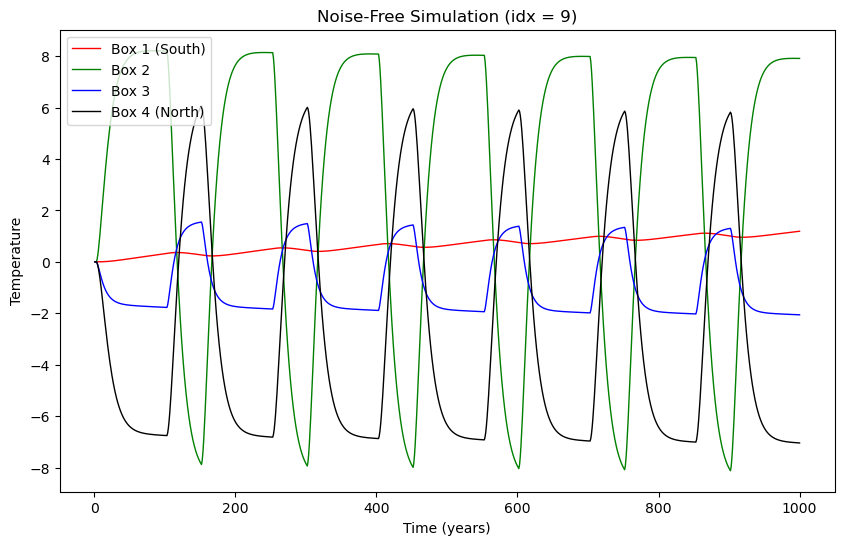

SNR calculations (per box and average) relative to noise-free simulation (idx = 9):
Signal std (box 1): 0.3019663424956711, Noise std (box 1): 0.04230592168687865
Signal std (box 2): 5.8114368624502735, Noise std (box 2): 0.029831682483749986
Signal std (box 3): 1.2646937849962585, Noise std (box 3): 0.02845748987257399
Signal std (box 4): 4.5988713822270055, Noise std (box 4): 0.02988038306236405
Simulation 0: SNR per box = [7.14, 194.81, 44.44, 153.91], Average SNR = 100.07
Signal std (box 1): 0.3019663424956711, Noise std (box 1): 0.07063060443709324
Signal std (box 2): 5.8114368624502735, Noise std (box 2): 0.03982650361631762
Signal std (box 3): 1.2646937849962585, Noise std (box 3): 0.03932807196302121
Signal std (box 4): 4.5988713822270055, Noise std (box 4): 0.041050847724315984
Simulation 1: SNR per box = [4.28, 145.92, 32.16, 112.03], Average SNR = 73.6
Signal std (box 1): 0.3019663424956711, Noise std (box 1): 0.30424202389379856
Signal std (box 2): 5.8114368624502735, Noise

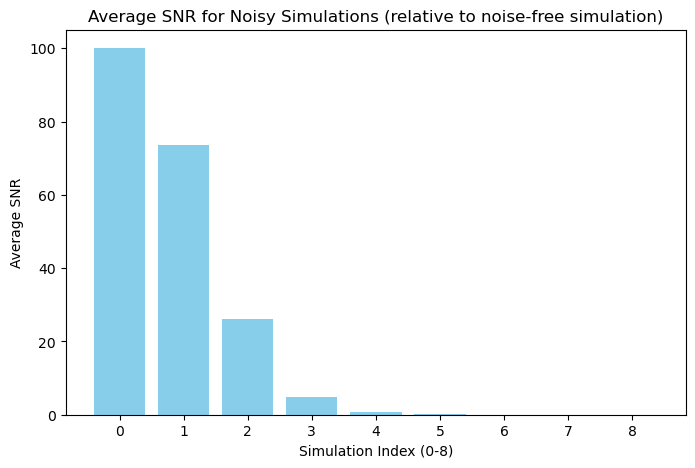

In [47]:
from toolbox import OneDModel_TBK as ODM
import importlib
import matplotlib.pyplot as plt
import numpy as np

# Reload the module in case of modifications
importlib.reload(ODM)

# Run the model (using provided parameters)
Temps_ori, F, Fadv = ODM.OneDModel(
    runlength=1000, 
    bpss_reoccurence=100, 
    bpss_length=50, 
    wnoise_level=0.005, 
    if_shift=False, 
    lag_multiplier=20, 
    show_figures=False
)

Temps = Temps_ori

# Create time vector based on the length of the time series in one box.
time = np.arange(1, Temps.shape[-1] + 1)

# Plot the noise-free simulation (idx = 9) for reference.
plt.figure(figsize=(10, 6))
plt.plot(time, Temps[9, 0, 1, :], 'r', linewidth=1, label='Box 1 (South)')
plt.plot(time, Temps[9, 0, 2, :], 'g', linewidth=1, label='Box 2')
plt.plot(time, Temps[9, 0, 3, :], 'b', linewidth=1, label='Box 3')
plt.plot(time, Temps[9, 0, 4, :], 'k', linewidth=1, label='Box 4 (North)')
plt.xlabel('Time (years)')
plt.ylabel('Temperature')
plt.title('Noise-Free Simulation (idx = 9)')
plt.legend()
plt.show()

# Loop through noisy simulations (idx = 0 to 8) and calculate SNR for each.
snr_values = []  # to store the average SNR per simulation

print("SNR calculations (per box and average) relative to noise-free simulation (idx = 9):")
for i in range(9):
    snr_boxes = []  # store SNR for each box (Box indices 1 to 4)
    for box in range(1, 5):
        # Get the noise-free signal and noisy signal for the current box.
        signal = Temps[9, 0, box, :]
        noisy = Temps[i, 0, box, :]
        
        # Calculate noise as the difference between noisy and noise-free signal.
        noise = noisy - signal
        
        # Compute standard deviations.
        signal_std = np.std(signal)
        noise_std = np.std(noise)
        # print the signal and noise std
        print(f"Signal std (box {box}): {signal_std}, Noise std (box {box}): {noise_std}")
        
        # Avoid division by zero.
        snr = signal_std / noise_std if noise_std != 0 else np.inf
        snr_boxes.append(snr)
    
    avg_snr = np.mean(snr_boxes)
    snr_values.append(avg_snr)
    print(f"Simulation {i}: SNR per box = {[round(val,2) for val in snr_boxes]}, Average SNR = {round(avg_snr,2)}")

# Plot the average SNR for simulations idx 0 to 8.
plt.figure(figsize=(8, 5))
plt.bar(np.arange(9), snr_values, color='skyblue')
plt.xlabel('Simulation Index (0-8)')
plt.ylabel('Average SNR')
plt.title('Average SNR for Noisy Simulations (relative to noise-free simulation)')
plt.xticks(np.arange(9))
plt.show()



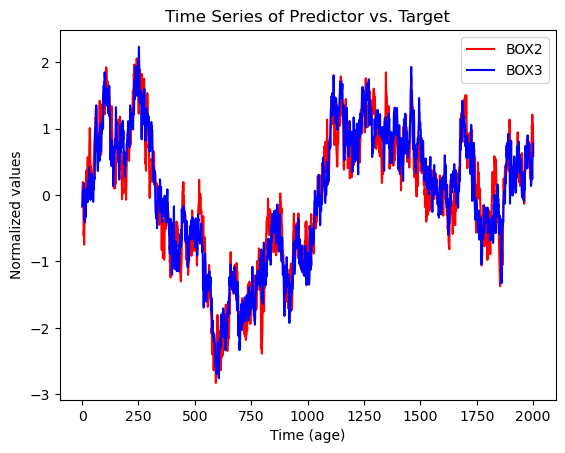

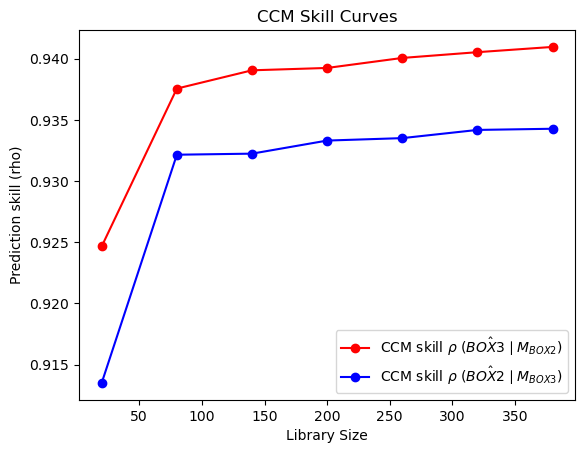

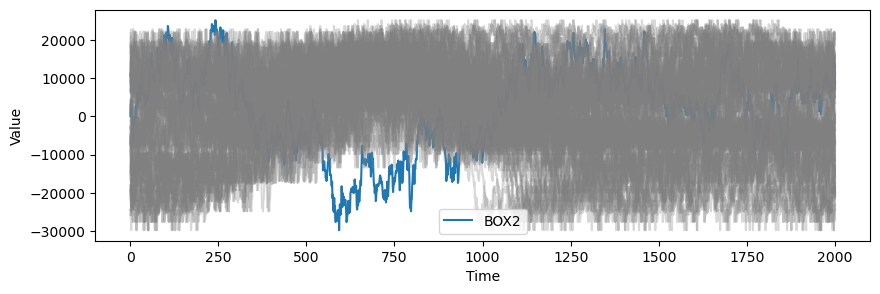

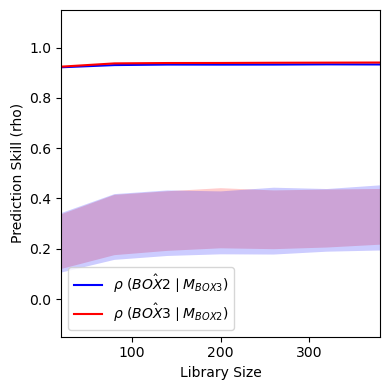

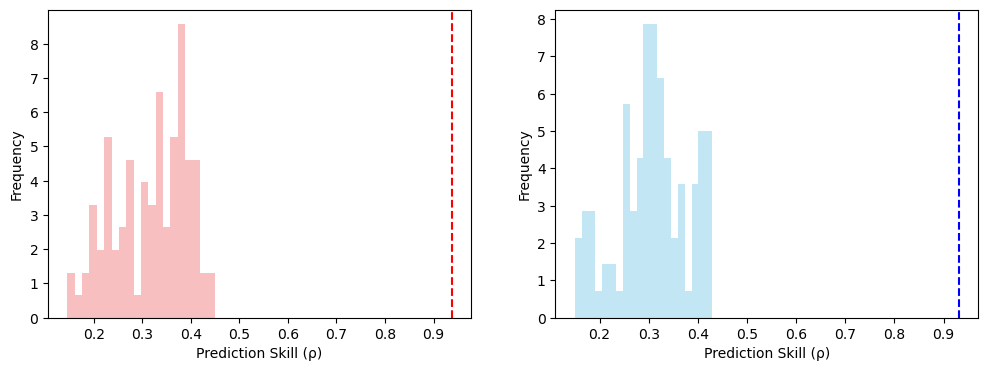

(True, True)


In [9]:

import pandas as pd
import numpy as np
from pyEDM import CCM
import matplotlib.pyplot as plt


idx = 8
data_array = Temps[idx, 0, 1:5, :].T.copy()
time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

# Prepare DataFrame
df_BOX2 = pd.DataFrame({
    'age': time,
    'BOX2': data_array[:, 1],  
})

df_BOX3 = pd.DataFrame({
    'age': time,
    'BOX3': data_array[:, 2],    
})


from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)


result = cf.ccm_DOXmapForcing(
    df_sd      = df_BOX2,
    df_pre     = df_BOX3,
    E          = 4,
    tau        = -2,
    libSizes   = "20 80 140 200 260 320 380",
    sample     = 10,
    showPlot   = True
)

from toolbox import significant_test as st
import importlib
importlib.reload(st)

ccm_out, ran_ccm_list,test_result = st.ccm_significance_test(
    df_sd      = df_BOX2,
    df_pre     = df_BOX3,
    E         = 4,
    tau       = -2,
    Tp =0,
    n_ran     = 100,
    libSizes  = "20 80 140 200 260 320 380",
    sample    = 10,
    showPlot  = True
)


print(test_result)

In [6]:
import numpy as np
import pandas as pd
from pyEDM import CCM
import plotly.graph_objects as go

idx = 9
data_array = Temps[idx, 0, 1:5, :].T.copy()
time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

df = pd.DataFrame({
    'age': time,
    'BOX2': data_array[:, 1],
    'BOX1': data_array[:, 0]
})


Tps = range(-10, 11)  # scanning Tp from -10 to 10
forward_max_rhos = []  # for X -> Y
reverse_max_rhos = []  # for Y -> X

# For each Tp, run CCM
for Tp in Tps:
    ccm_out = CCM(
        dataFrame   = df,
        E           = 4,
        tau         = -2,
        columns     = 'BOX2',    # use X as the library (predictor)
        target      = 'BOX1',    # predict Y (target)
        libSizes    = '100',
        sample      = 100,
        random      = True,
        replacement = False,
        Tp          = Tp
    )

    forward_rho = ccm_out['BOX2:BOX1'].max()  # X->Y (i.e. predicting Y from X)
    reverse_rho = ccm_out['BOX1:BOX2'].max()  # Y->X (predicting X from Y)
    forward_max_rhos.append(forward_rho)
    reverse_max_rhos.append(reverse_rho)

# Plot the CCM skill vs. Tp using Plotly
fig = go.Figure()

# Plot for X -> Y
fig.add_trace(go.Scatter(
    x=list(Tps),
    y=forward_max_rhos,
    mode='lines+markers',
    name=fr"CCM skill ρ ($\hat{{BOX1}}\mid M_{{BOX2}}$)"
))
# Plot for Y -> X
fig.add_trace(go.Scatter(
    x=list(Tps),
    y=reverse_max_rhos,
    mode='lines+markers',
    name=fr"CCM skill ρ ($\hat{{BOX2}}\mid M_{{BOX1}}$)"
))

fig.update_layout(
    title="Max CCM Skill vs. Tp",
    xaxis_title="Tp (Time displacement)",
    yaxis_title="Max CCM Skill (rho)",
    width=900,
    height=400
)
fig.update_xaxes(tickmode='array', tickvals=list(Tps))
fig.show()


In [7]:
import numpy as np
import pandas as pd
from pyEDM import CCM
import plotly.graph_objects as go

idx = 9
data_array = Temps[idx, 0, 1:5, :].T.copy()
time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

df = pd.DataFrame({
    'age': time,
    'BOX2': data_array[:, 1],
    'BOX3': data_array[:, 2]
})


Tps = range(-10, 11)  # scanning Tp from -10 to 10
forward_max_rhos = []  # for X -> Y
reverse_max_rhos = []  # for Y -> X

# For each Tp, run CCM
for Tp in Tps:
    ccm_out = CCM(
        dataFrame   = df,
        E           = 4,
        tau         = -2,
        columns     = 'BOX2',    # use X as the library (predictor)
        target      = 'BOX3',    # predict Y (target)
        libSizes    = '100',
        sample      = 100,
        random      = True,
        replacement = False,
        Tp          = Tp
    )

    forward_rho = ccm_out['BOX2:BOX3'].max()  # X->Y (i.e. predicting Y from X)
    reverse_rho = ccm_out['BOX3:BOX2'].max()  # Y->X (predicting X from Y)
    forward_max_rhos.append(forward_rho)
    reverse_max_rhos.append(reverse_rho)

# Plot the CCM skill vs. Tp using Plotly
fig = go.Figure()

# Plot for X -> Y
fig.add_trace(go.Scatter(
    x=list(Tps),
    y=forward_max_rhos,
    mode='lines+markers',
    name=fr"CCM skill ρ ($\hat{{BOX3}}\mid M_{{BOX2}}$)"
))
# Plot for Y -> X
fig.add_trace(go.Scatter(
    x=list(Tps),
    y=reverse_max_rhos,
    mode='lines+markers',
    name=fr"CCM skill ρ ($\hat{{BOX2}}\mid M_{{BOX3}}$)"
))

fig.update_layout(
    title="Max CCM Skill vs. Tp",
    xaxis_title="Tp (Time displacement)",
    yaxis_title="Max CCM Skill (rho)",
    width=900,
    height=400
)
fig.update_xaxes(tickmode='array', tickvals=list(Tps))
fig.show()


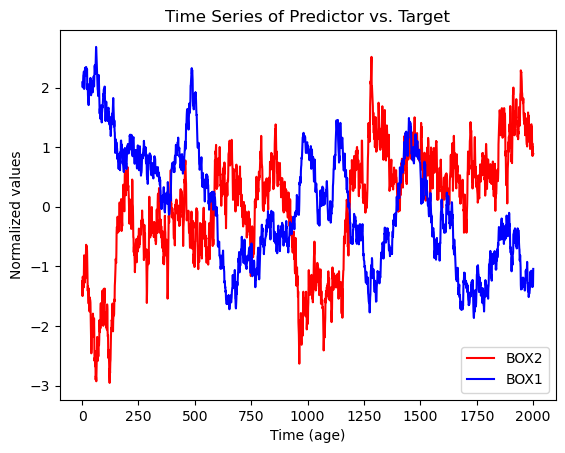

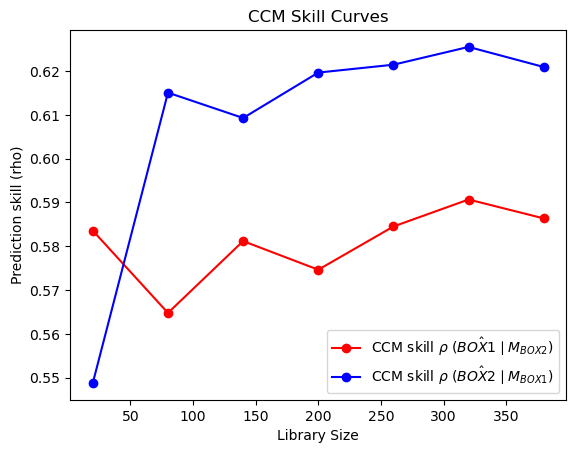

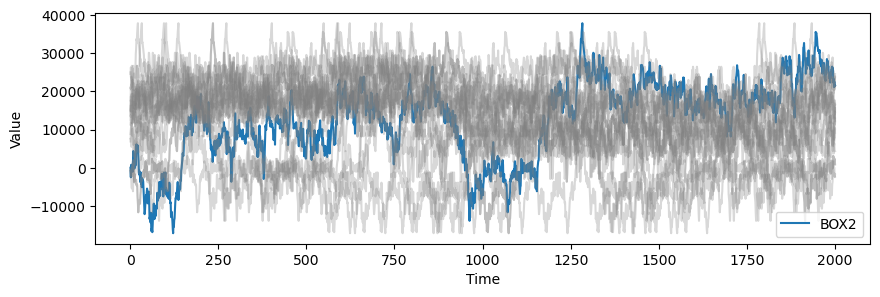

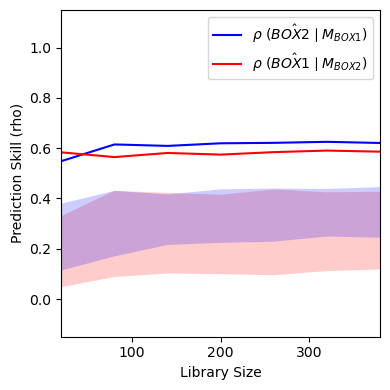

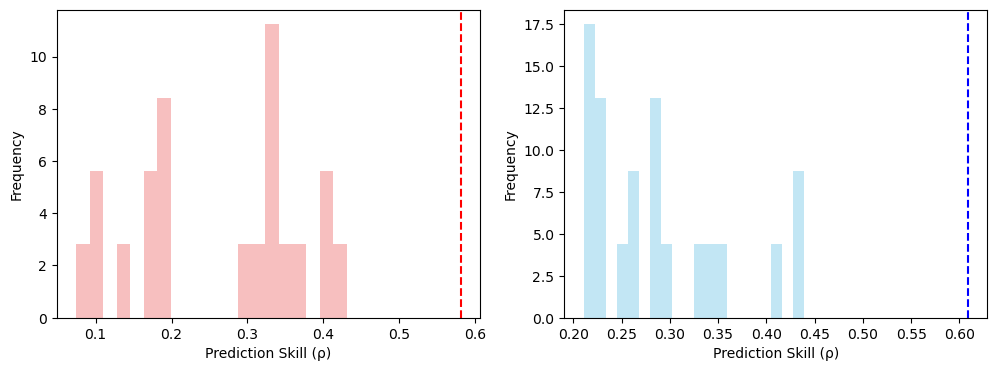

(True, True)


In [7]:

import pandas as pd
import numpy as np
from pyEDM import CCM
import matplotlib.pyplot as plt


idx = 8
data_array = Temps[idx, 0, 1:5, :].T.copy()
time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

# Prepare DataFrame
df_BOX2 = pd.DataFrame({
    'age': time,
    'BOX2': data_array[:, 1],  
})

df_BOX1 = pd.DataFrame({
    'age': time,
    'BOX1': data_array[:, 0],    
})


from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)


result = cf.ccm_DOXmapForcing(
    df_sd      = df_BOX2,
    df_pre     = df_BOX1,
    E          = 4,
    tau        = 2,
    libSizes   = "20 80 140 200 260 320 380",
    sample     = 10,
    showPlot   = True
)

from toolbox import significant_test as st
import importlib
importlib.reload(st)

ccm_out, ran_ccm_list,test_result = st.ccm_significance_test(
    df_sd      = df_BOX2,
    df_pre     = df_BOX1,
    E         = 4,
    tau       = 2,
    Tp =0,
    n_ran     = 20,
    libSizes  = "20 80 140 200 260 320 380",
    sample    = 10,
    showPlot  = True
)


print(test_result)

In [9]:
import numpy as np
import pandas as pd
from pyEDM import CCM
import plotly.graph_objects as go

idx = 9
data_array = Temps[idx, 0, 1:5, :].T.copy()
time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

df = pd.DataFrame({
    'age': time,
    'BOX2': data_array[:, 1],
    'BOX1': data_array[:, 0]
})


Tps = range(-10, 11)  # scanning Tp from -10 to 10
forward_max_rhos = []  # for X -> Y
reverse_max_rhos = []  # for Y -> X

# For each Tp, run CCM
for Tp in Tps:
    ccm_out = CCM(
        dataFrame   = df,
        E           = 2,
        tau         = 1,
        columns     = 'BOX2',    # use X as the library (predictor)
        target      = 'BOX1',    # predict Y (target)
        libSizes    = '100',
        sample      = 100,
        random      = True,
        replacement = False,
        Tp          = Tp
    )

    forward_rho = ccm_out['BOX2:BOX1'].max()  # X->Y (i.e. predicting Y from X)
    reverse_rho = ccm_out['BOX1:BOX2'].max()  # Y->X (predicting X from Y)
    forward_max_rhos.append(forward_rho)
    reverse_max_rhos.append(reverse_rho)

# Plot the CCM skill vs. Tp using Plotly
fig = go.Figure()

# Plot for X -> Y
fig.add_trace(go.Scatter(
    x=list(Tps),
    y=forward_max_rhos,
    mode='lines+markers',
    name=fr"CCM skill ρ ($\hat{{BOX1}}\mid M_{{BOX2}}$)"
))
# Plot for Y -> X
fig.add_trace(go.Scatter(
    x=list(Tps),
    y=reverse_max_rhos,
    mode='lines+markers',
    name=fr"CCM skill ρ ($\hat{{BOX2}}\mid M_{{BOX1}}$)"
))

fig.update_layout(
    title="Max CCM Skill vs. Tp",
    xaxis_title="Tp (Time displacement)",
    yaxis_title="Max CCM Skill (rho)",
    width=900,
    height=400
)
fig.update_xaxes(tickmode='array', tickvals=list(Tps))
fig.show()



Running TBK model with lag_multiplier = 1
  Lag 1, Sim 1 (noise level 0.005): CCM bidirectional? True
  Lag 1, Sim 2 (noise level 0.010): CCM bidirectional? True
  Lag 1, Sim 3 (noise level 0.015): CCM bidirectional? True
  Lag 1, Sim 4 (noise level 0.020): CCM bidirectional? False
  Lag 1, Sim 5 (noise level 0.025): CCM bidirectional? False
  Lag 1, Sim 6 (noise level 0.030): CCM bidirectional? True
  Lag 1, Sim 7 (noise level 0.035): CCM bidirectional? True
  Lag 1, Sim 8 (noise level 0.040): CCM bidirectional? True
  Lag 1, Sim 9 (noise level 0.045): CCM bidirectional? True

Running TBK model with lag_multiplier = 2
  Lag 2, Sim 1 (noise level 0.005): CCM bidirectional? True
  Lag 2, Sim 2 (noise level 0.010): CCM bidirectional? True
  Lag 2, Sim 3 (noise level 0.015): CCM bidirectional? True
  Lag 2, Sim 4 (noise level 0.020): CCM bidirectional? False
  Lag 2, Sim 5 (noise level 0.025): CCM bidirectional? False
  Lag 2, Sim 6 (noise level 0.030): CCM bidirectional? True
  Lag 2, S

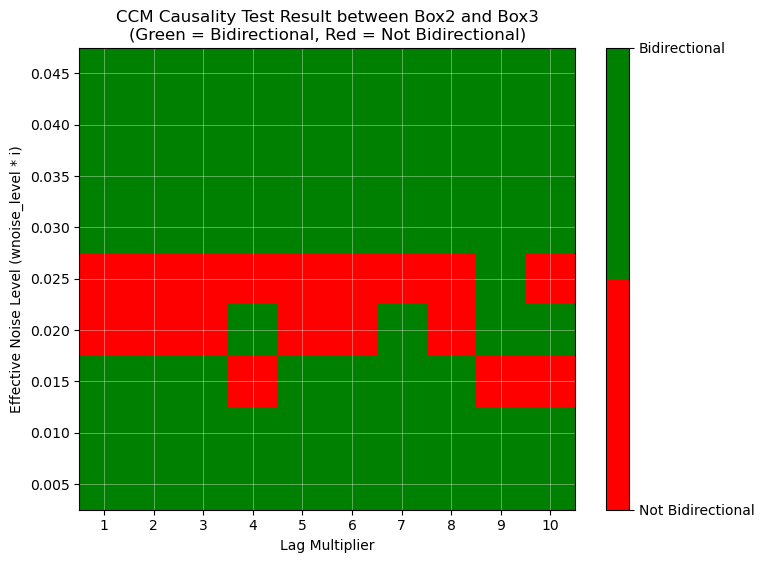

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from matplotlib.colors import ListedColormap

# Import the TBK model and CCM significance test functions.
from toolbox import OneDModel_TBK as ODM
from toolbox import significant_test as st

# Reload modules in case of updates.
importlib.reload(ODM)
importlib.reload(st)

# --- TBK Model Parameters ---
runlength = 1200
bpss_reoccurence = 100
bpss_length = 50
base_wnoise_level = 0.005  # base white noise level
if_shift = False          # no shifting

# --- Loop Parameters ---
num_lag = 10              # lag_multiplier from 1 to 10
num_noise_levels = 9      # noisy simulations indices 0 to 8; simulation index 9 is noise-free

# Initialize a matrix to store the CCM test result:
# rows: different effective noise levels (sim index 0 to 8)
# cols: different lag_multiplier values (1 to 10)
ccm_matrix = np.zeros((num_noise_levels, num_lag))  # will store 1 if bidirectional, else 0

# Effective noise levels (for noisy simulations, index 0 corresponds to effective noise = base*1, etc.)
effective_noise_levels = base_wnoise_level * np.arange(1, num_noise_levels + 1)

# Loop over lag_multiplier values.
for lag in range(1, num_lag + 1):
    print(f"\nRunning TBK model with lag_multiplier = {lag}")
    # Run TBK model with current lag_multiplier.
    # This returns an array with shape (10, 1, 6, nsteps)
    Temps, F, Fadv = ODM.OneDModel(runlength=runlength,
                                    bpss_reoccurence=bpss_reoccurence,
                                    bpss_length=bpss_length,
                                    wnoise_level=base_wnoise_level,
                                    if_shift=if_shift,
                                    lag_multiplier=lag,
                                    show_figures=False)
    
    # Determine time vector from the returned data.
    nsteps = Temps.shape[-1]
    time = np.arange(1, nsteps + 1)
    
    # For each noisy simulation (sim indices 0 to 8) test causality between Box2 and Box3.
    for sim in range(num_noise_levels):
        # Extract the time series for boxes 1–4.
        # Note: In the TBK model, the "real" boxes are stored at indices 1,2,3,4.
        # Here we use Box2 (second in this slice; index 1) and Box3 (third in this slice; index 2).
        data_array = Temps[sim, 0, 1:5, :].T  # shape: (nsteps, 4)
        
        # Prepare DataFrames for CCM:
        df_BOX2 = pd.DataFrame({
            'age': time,
            'BOX2': data_array[:, 1]   # Box2
        })
        df_BOX3 = pd.DataFrame({
            'age': time,
            'BOX3': data_array[:, 2]   # Box3
        })
        
        # Run CCM significance test between Box2 (predictor) and Box3 (target).
        # We use parameters: E=4, tau=2, Tp=0, n_ran=20, libSizes="20 80 140 200 260 320 380", sample=10.
        # Set showPlot=False to avoid drawing a figure each time.
        _, _, test_result = st.ccm_significance_test(
            df_sd    = df_BOX2,
            df_pre   = df_BOX3,
            E        = 4,
            tau      = 2,
            Tp       = 0,
            n_ran    = 20,
            libSizes = "20 80 140 200 260 320 380",
            sample   = 10,
            showPlot = False
        )
        # Interpret bidirectional causality as both significance tests returning True.
        bidirectional = (test_result[0] and test_result[1])
        ccm_matrix[sim, lag - 1] = 1 if bidirectional else 0
        
        print(f"  Lag {lag}, Sim {sim+1} (noise level {base_wnoise_level*(sim+1):.3f}): CCM bidirectional? {bidirectional}")

# --- Plotting the Results as a Colormap ---
# Create a discrete colormap: green for bidirectional (1) and red for not (0).
cmap = ListedColormap(['red', 'green'])

plt.figure(figsize=(8, 6))
# Use imshow to display the matrix.
# Set origin='lower' so that the lowest effective noise level appears at the bottom.
# We'll set extent so that x-axis shows lag multipliers (1 to 10) and y-axis shows effective noise levels.
extent = [0.5, num_lag + 0.5, effective_noise_levels[0] - 0.5 * base_wnoise_level, effective_noise_levels[-1] + 0.5 * base_wnoise_level]
im = plt.imshow(ccm_matrix, aspect='auto', origin='lower', extent=extent, cmap=cmap)
# Add grid lines for better readability.
plt.grid(color='white', linestyle='-', linewidth=0.5, alpha=0.5)

plt.xlabel("Lag Multiplier")
plt.ylabel("Effective Noise Level (wnoise_level * i)")
plt.title("CCM Causality Test Result between Box2 and Box3\n(Green = Bidirectional, Red = Not Bidirectional)")
plt.xticks(np.arange(1, num_lag + 1, 1))
# Set y-ticks to the effective noise levels.
plt.yticks(effective_noise_levels, [f"{val:.3f}" for val in effective_noise_levels])
cbar = plt.colorbar(im, ticks=[0, 1])
cbar.ax.set_yticklabels(["Not Bidirectional", "Bidirectional"])
plt.show()



Running TBK model with lag_multiplier = 1
Average SNR for lag 1: 30.86


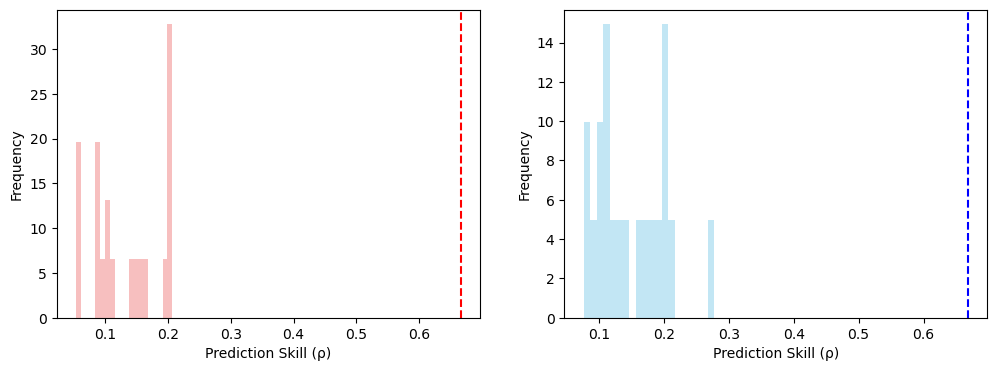

CCM bidirectional test for lag 1: True

Running TBK model with lag_multiplier = 2
Average SNR for lag 2: 22.65


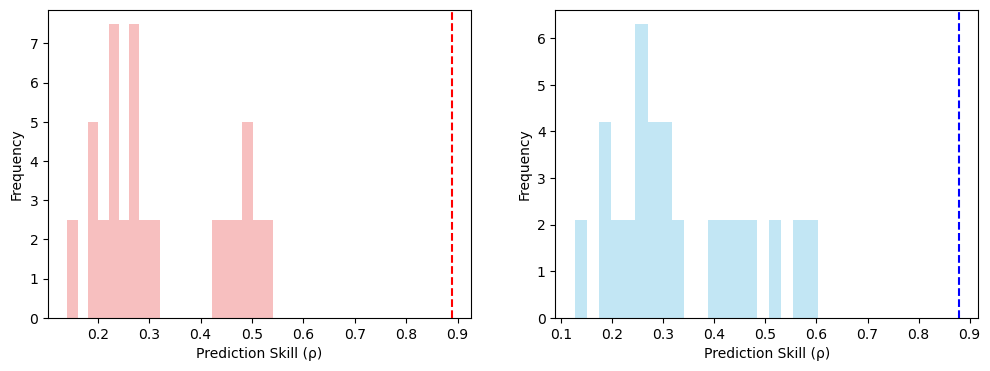

CCM bidirectional test for lag 2: True

Running TBK model with lag_multiplier = 3
Average SNR for lag 3: 20.08


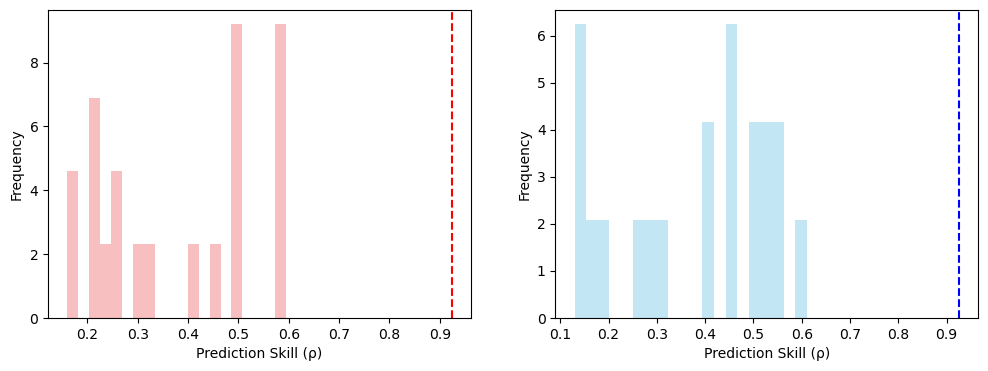

CCM bidirectional test for lag 3: True

Running TBK model with lag_multiplier = 4
Average SNR for lag 4: 26.01


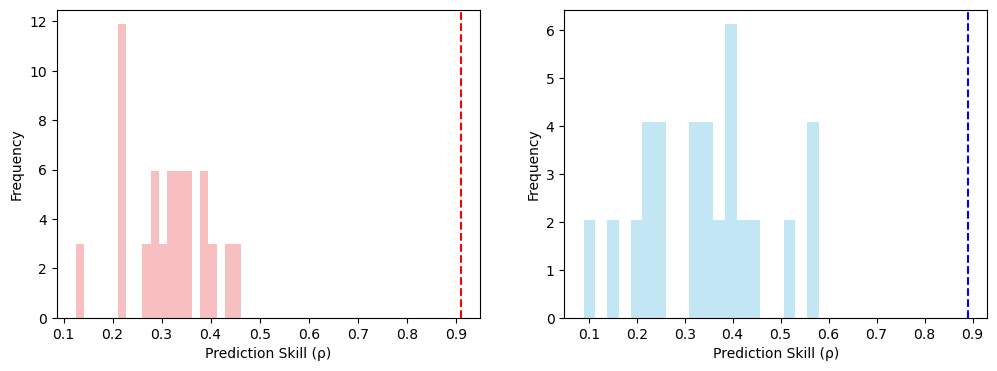

CCM bidirectional test for lag 4: True

Running TBK model with lag_multiplier = 5
Average SNR for lag 5: 24.88


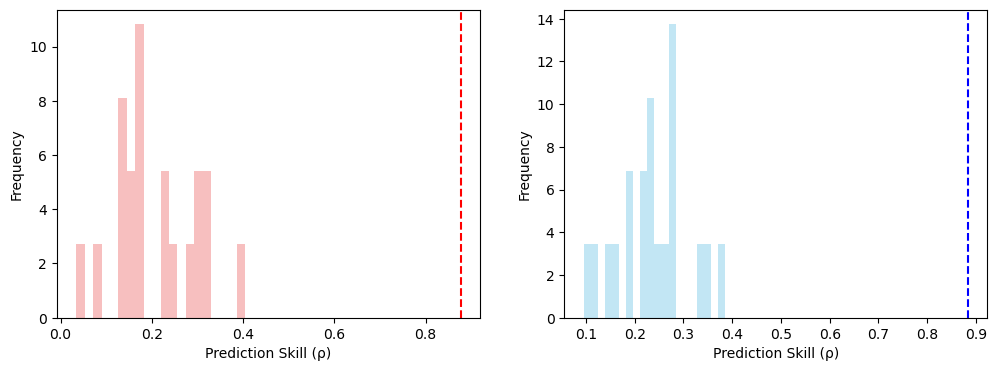

CCM bidirectional test for lag 5: True

Running TBK model with lag_multiplier = 6
Average SNR for lag 6: 21.15


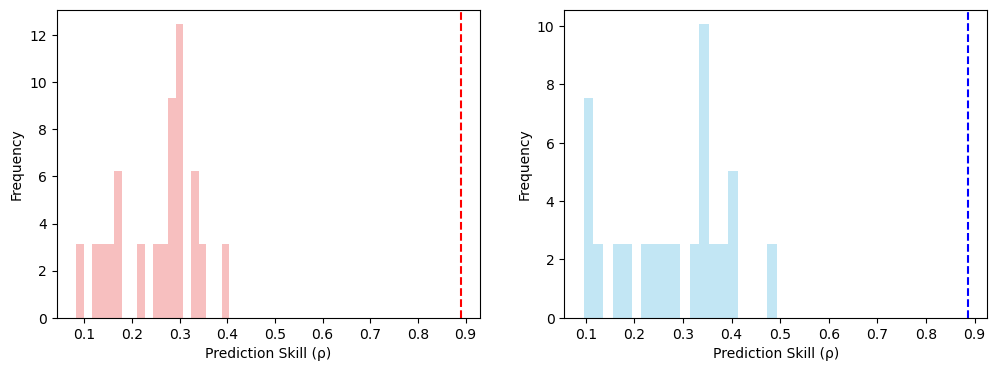

CCM bidirectional test for lag 6: True

Running TBK model with lag_multiplier = 7
Average SNR for lag 7: 27.00


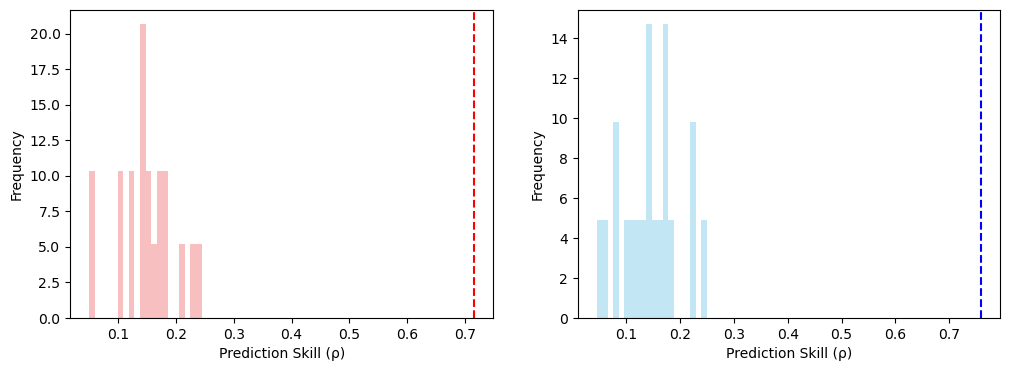

CCM bidirectional test for lag 7: True

Running TBK model with lag_multiplier = 8
Average SNR for lag 8: 25.97


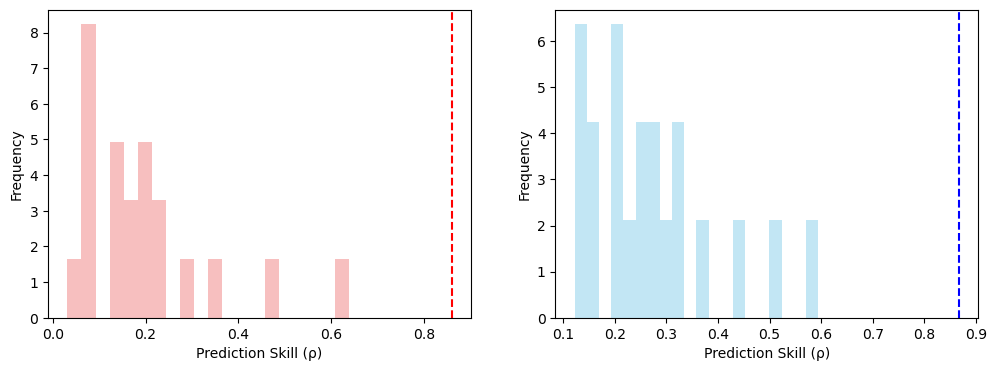

CCM bidirectional test for lag 8: True

Running TBK model with lag_multiplier = 9
Average SNR for lag 9: 27.80


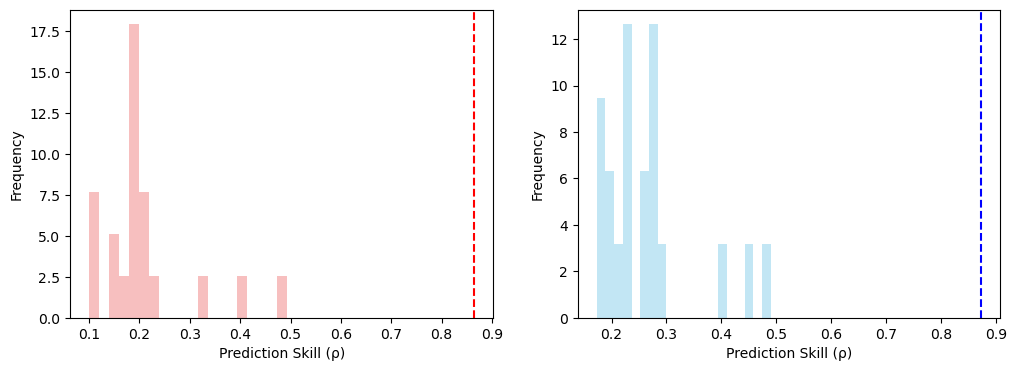

CCM bidirectional test for lag 9: True

Running TBK model with lag_multiplier = 10
Average SNR for lag 10: 24.82


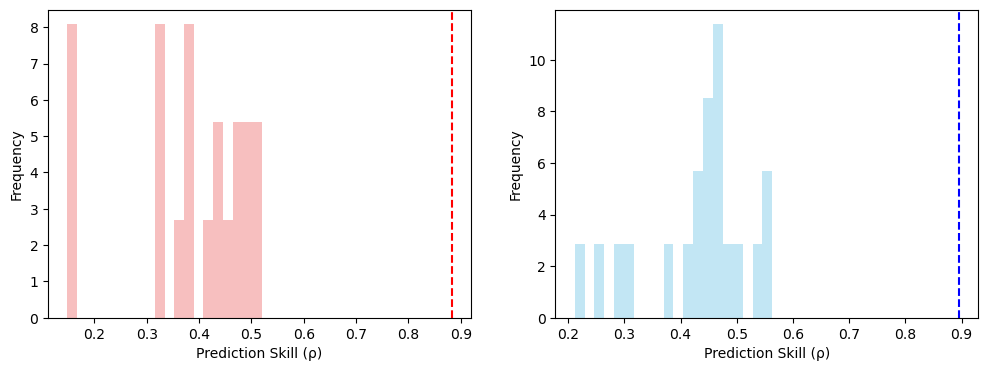

CCM bidirectional test for lag 10: True


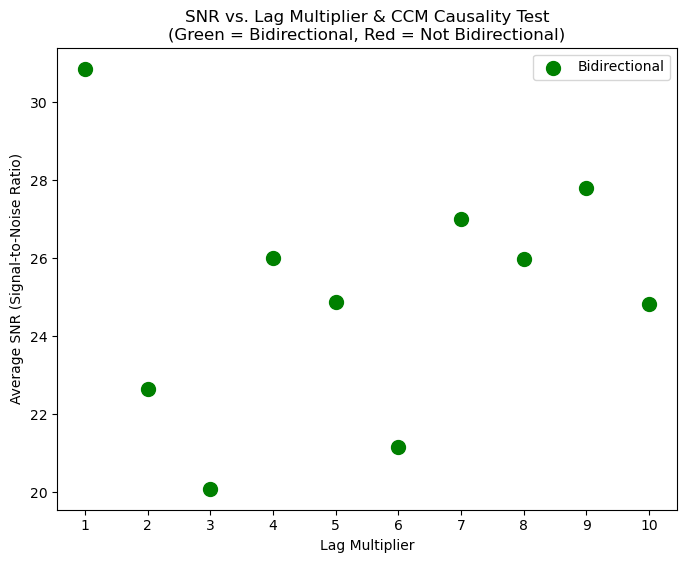

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib

# Import the TBK model and CCM significance test functions.
from toolbox import OneDModel_TBK as ODM
from toolbox import significant_test as st

# (Reload modules if necessary)
importlib.reload(ODM)
importlib.reload(st)

# Parameters for the TBK model
runlength = 1000
bpss_reoccurence = 100
bpss_length = 50
wnoise_level = 0.005
if_shift = False  # no shifting
# We'll loop over lag_multiplier from 1 to 10

# Prepare to store SNR values and CCM test outcomes for each lag_multiplier.
lag_values = np.arange(1, 11)
avg_snr_list = []            # average SNR for each lag multiplier (averaged over simulations and boxes)
ccm_bidirectional_list = []  # True if CCM test indicates bidirectional causality, else False

# Create a time vector for later use (using the length from the first model run)
# We'll call the TBK model once with lag_multiplier=1 to get the length.
Temps_tmp, _, _ = ODM.OneDModel(runlength=runlength,
                                  bpss_reoccurence=bpss_reoccurence,
                                  bpss_length=bpss_length,
                                  wnoise_level=wnoise_level,
                                  if_shift=if_shift,
                                  lag_multiplier=1,
                                  show_figures=False)
time = np.arange(1, Temps_tmp.shape[-1] + 1)

# Loop over lag_multiplier values
for lag in lag_values:
    print(f"\nRunning TBK model with lag_multiplier = {lag}")

    Temps, F, Fadv = ODM.OneDModel(runlength=runlength,
                                    bpss_reoccurence=bpss_reoccurence,
                                    bpss_length=bpss_length,
                                    wnoise_level=wnoise_level,
                                    if_shift=if_shift,
                                    lag_multiplier=lag,
                                    show_figures=False)
    

    snr_vals = []  # SNR for each noisy simulation
    for sim in range(9):
        box_snr = []
        for box in range(1, 5):  # boxes 1,2,3,4
            signal = Temps[9, 0, box, :]      # noise-free data for current box
            noisy  = Temps[sim, 0, box, :]      # noisy data for current simulation & box
            noise  = noisy - signal
            signal_std = np.std(signal)
            noise_std  = np.std(noise)
            snr_box = signal_std / noise_std if noise_std != 0 else np.inf
            box_snr.append(snr_box)
        # Average SNR over the 4 boxes for this simulation:
        snr_vals.append(np.mean(box_snr))
    # Average SNR over the 9 noisy simulations:
    avg_snr = np.mean(snr_vals)
    avg_snr_list.append(avg_snr)
    print(f"Average SNR for lag {lag}: {avg_snr:.2f}")
    

    data_array = Temps[8, 0, 1:5, :].T  # shape (nsteps, 4)
    
    df_BOX2 = pd.DataFrame({
        'age': time,
        'BOX2': data_array[:, 1]   # Box2 time series
    })
    df_BOX3 = pd.DataFrame({
        'age': time,
        'BOX3': data_array[:, 2]   # Box3 time series
    })
    

    _, _, test_result = st.ccm_significance_test(
        df_sd    = df_BOX2,   # predictor: Box2
        df_pre   = df_BOX3,   # target: Box3
        E        = 4,
        tau      = 2,
        Tp       = 0,
        n_ran    = 20,
        libSizes = "20 80 140 200 260 320 380",
        sample   = 10,
        showPlot = False
    )
    bidirectional = (test_result[0] and test_result[1])
    ccm_bidirectional_list.append(bidirectional)
    print(f"CCM bidirectional test for lag {lag}: {bidirectional}")

# --- Create a scatter plot: x-axis = lag multiplier, y-axis = average SNR ---
plt.figure(figsize=(8, 6))
for lag, snr_val, bidir in zip(lag_values, avg_snr_list, ccm_bidirectional_list):
    if bidir:
        plt.scatter(lag, snr_val, color='green', s=100, label='Bidirectional' if 'Bidirectional' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(lag, snr_val, color='red', s=100, label='Not Bidirectional' if 'Not Bidirectional' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.xlabel("Lag Multiplier")
plt.ylabel("Average SNR (Signal-to-Noise Ratio)")
plt.title("SNR vs. Lag Multiplier & CCM Causality Test\n(Green = Bidirectional, Red = Not Bidirectional)")
plt.xticks(lag_values)
plt.legend()
plt.show()
